# Load the data

In [1]:
import warnings
!pip install -r requirement.txt
warnings.filterwarnings('ignore')
from FeatureEngineering import *

In [2]:
from FeatureEngineering import *
data_dir = './data/'
data = my_read_csv(data_dir+'data_v1.csv')

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32902 entries, 0 to 32901
Data columns (total 218 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        float64
 2    NAME_CONTRACT_TYPE_x          object 
 3    CODE_GENDER                   int64  
 4    FLAG_OWN_CAR                  int64  
 5    FLAG_OWN_REALTY               int64  
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT_x                  float64
 9    AMT_ANNUITY_x                 float64
 10   AMT_GOODS_PRICE_x             float64
 11   NAME_TYPE_SUITE_x             object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DAYS

The data description for each columns

In [4]:
data_desc = my_read_csv(data_dir+'HomeCredit_columns_description.csv')
data_desc.tail(10)

,Table,Row,Description,Special
209,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application
210,previous_application.csv,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the ...,NaN
211,installments_payments.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
212,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
213,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
214,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
218,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


For the duplicated columns during join, like 'AMT_GOODS_PRICE_x' and 'AMT_GOODS_PRICE_y', only keep one of them

In [5]:
data = remove_duplicated_cols(data, list(data_desc.Row))
data.head()
    

Removed 12 duplicated columns
Keeped 12 columns for each orginal column


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS
0,100002,1.0,Cash loans,0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,Cash loans,1,0,1,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,Revolving loans,0,1,0,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,Cash loans,1,0,0,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,0,0,0,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
x_vars, y_var = list(data.loc[:,data.columns !='TARGET'].columns),'TARGET'
desc_df = show_description(x_vars, data_desc)
desc_df

,Column,Desc
0,SK_ID_CURR,ID of loan in our sample
1,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
2,CODE_GENDER,Gender of the client
3,FLAG_OWN_CAR,Flag if the client owns a car
4,FLAG_OWN_REALTY,Flag if client owns a house or flat
...,...,...
200,CNT_DRAWINGS_CURRENT,Number of drawings during this month on the pr...
201,CNT_DRAWINGS_OTHER_CURRENT,Number of other drawings during this month on ...
202,CNT_DRAWINGS_POS_CURRENT,Number of drawings for goods during this month...
203,CNT_INSTALMENT_MATURE_CUM,Number of paid installments on the previous cr...


In [7]:
non_desc_df = desc_df[desc_df.Desc.isnull()]
print('There are {} columns without description in all the columns'.format(len(non_desc_df)))
non_desc_df


There are 12 columns without description in all the columns


,Column,Desc
121,DAYS_EMPLOYED_PERC,None
122,INCOME_CREDIT_PERC,None
123,INCOME_PER_PERSON,None
124,ANNUITY_INCOME_PERC,None
125,PAYMENT_RATE,None
140,MONTHS_BALANCE_MIN,None
141,MONTHS_BALANCE_MAX,None
142,MONTHS_BALANCE_SIZE,None
143,SK_ID_PREV,None
173,APP_CREDIT_PERC,None


I droped all the columns without description

In [8]:
non_desc_list = list(non_desc_df.Column)
data.drop(columns = non_desc_list,inplace=True)

# Select catergorical and numerical columns
## Numerical features:
- 1. Select those columns whose datatype is float or int64
- 2. Removes all low-variance features whose variance lower than $1*10^{-8}$
- 3. Check columns such as 'SK_DPD_*', 'FLAG_*' to see if it's really numerical features

In [9]:
# 1. select those columns whose datatype is float or int
potential_num_df = select_col_by_dtype(data, ['float64','int64'])

There are 164 columns whose datatype is ['float64', 'int64']


In [10]:
potential_num_list = list(potential_num_df.columns)
potential_num_list.remove('TARGET')
potential_num_df = potential_num_df.loc[:,potential_num_list]

In [11]:
potential_num_df_desc = show_description(potential_num_list, data_desc)
potential_num_df_desc

,Column,Desc
0,SK_ID_CURR,ID of loan in our sample
1,CODE_GENDER,Gender of the client
2,FLAG_OWN_CAR,Flag if the client owns a car
3,FLAG_OWN_REALTY,Flag if client owns a house or flat
4,CNT_CHILDREN,Number of children the client has
...,...,...
160,CNT_DRAWINGS_ATM_CURRENT,Number of drawings at ATM during this month on...
161,CNT_DRAWINGS_CURRENT,Number of drawings during this month on the pr...
162,CNT_DRAWINGS_OTHER_CURRENT,Number of other drawings during this month on ...
163,CNT_DRAWINGS_POS_CURRENT,Number of drawings for goods during this month...


I find that all the columns containing 'FLAG' is catergorical

In [12]:
flag_col_list = []
for col in potential_num_df.columns:
    if 'FLAG' in col:
        flag_col_list.append(col)
show_description(flag_col_list,data_desc)

,Column,Desc
0,FLAG_OWN_CAR,Flag if the client owns a car
1,FLAG_OWN_REALTY,Flag if client owns a house or flat
2,FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)"
3,FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)"
4,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)"
5,FLAG_CONT_MOBILE,"Was mobile phone reachable (1=YES, 0=NO)"
6,FLAG_PHONE,"Did client provide home phone (1=YES, 0=NO)"
7,FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)"
8,FLAG_DOCUMENT_2,Did client provide document 2
9,FLAG_DOCUMENT_3,Did client provide document 3


In [13]:
potential_num_df.drop(columns = flag_col_list, inplace=True)
# update potential_num_list
potential_num_list = list(potential_num_df.columns)


In [14]:
# 2. Remove low-variance features whose variance lower than 1*10^(-8) - similar to constant
variance_threshhold = 0.00000001
potential_num_df = remove_lowvariance(potential_num_df, variance_threshhold)
potential_num_df
potential_num_list = list(potential_num_df.columns)

0 constant features are removed, namely []
There are 147 columns after removing constants


## Catergorical columns:
- If the datatype is 'object' or contains 'FLAG', it must be catergorical feature
- Elif the datatype is 'int64', it may be catergorical feature
- If the datatype is 'float64', it may be catergorical feature

In [15]:
# Firstly, the columns of 'object' dtype must be catergorical data 
cat_df = select_col_by_dtype(data, ['object'])
cat_columns = list(cat_df.columns)
print('After adding in {} columns contain FLAG'.format(len(flag_col_list)))
# Add the columns containing FLAG into cat_columns
cat_columns = cat_columns + flag_col_list
cat_df = data.loc[:,cat_columns]
print('There are {} columns that I am sure they are catergorical data'.format(len(cat_columns)))
cat_columns

There are 30 columns whose datatype is ['object']
After adding in 30 columns contain FLAG
There are 62 columns that I am sure they are catergorical data


['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_STATUS',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUM

In [16]:
cat_df_desc = show_description(cat_columns, data_desc)
cat_df_desc

,Column,Desc
0,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
1,NAME_TYPE_SUITE,Who was accompanying client when he was applyi...
2,NAME_INCOME_TYPE,"Clients income type (businessman, working, mat..."
3,NAME_EDUCATION_TYPE,Level of highest education the client achieved
4,NAME_FAMILY_STATUS,Family status of the client
...,...,...
57,FLAG_DOCUMENT_19,Did client provide document 19
58,FLAG_DOCUMENT_20,Did client provide document 20
59,FLAG_DOCUMENT_21,Did client provide document 21
60,NFLAG_LAST_APPL_IN_DAY,Flag if the application was the last applicati...


All the catergorical data has meaning

In [17]:
cat_df_desc.isnull().sum()

Column    0
Desc      0
dtype: int64

# Check missing values

In [18]:
print('There are {:%} of data whose target is none'.format(len(data[data.TARGET.isnull()])/len(data)))

There are 55.258039% of data whose target is none


## Delete rows whose target is none

In [19]:
new_data = data.dropna(subset=['TARGET'])
print('After deleting those whose target is none, {} rows will be deleted, and there are only {} rows left'.format( len(data)-len(new_data),len(new_data)))
data = new_data

After deleting those whose target is none, 18181 rows will be deleted, and there are only 14721 rows left


In [20]:
new_data.shape

(14721, 194)

In [21]:
data.shape

(14721, 194)

Check the number of missing features for each row

In [22]:
missing_num = data.isnull().sum(axis=1).values
missing_num

array([ 73,  68, 120, ..., 125, 125, 125])

In [23]:
print("If we dropna for our current {} rows of data, there will be {} rows left".format(len(data),len(data.dropna())))

If we dropna for our current 14721 rows of data, there will be 0 rows left


As we can see, the highly missing values are majorly some processed data such as `RATE_INTEREST_PRIMARY	`:'Interest rate normalized on previous credi'. But I haven't figured out the reason for that.

In [24]:
# Let's look at the columns whose missing ratio is larger than 0.5
highly_missing_cols = filter_columns_by_missing_ratio(data, 0.5)

desc_df = show_description(highly_missing_cols, data_desc)
# list_1 = [i for i in desc_df['Desc'].values if 'normalized' in i.lower()]
# print('There are {} columns in the missing cols that is normalized, which is {:%} out of all the missing values'.format(len(list_1),len(list_1)/len(highly_missing_cols)))
desc_df


,Column,Desc
0,RATE_INTEREST_PRIVILEGED,Interest rate normalized on previous credit
1,RATE_INTEREST_PRIMARY,Interest rate normalized on previous credit
2,DAYS_FIRST_DRAWING,Relative to application date of current applic...
3,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...
4,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...
...,...,...
73,NONLIVINGAREA_AVG,Normalized information about building where th...
74,NONLIVINGAREA_MODE,Normalized information about building where th...
75,ELEVATORS_MEDI,Normalized information about building where th...
76,ELEVATORS_AVG,Normalized information about building where th...


In [25]:
# I want to check if there are non-normalized data for 'interest' but I failed.
[i for i in data.columns if 'INTEREST' in i]

['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']

,MissingRatio,ColNumb
0,0.1,64.0
1,0.2,78.0
2,0.3,87.0
3,0.4,97.0
4,0.5,116.0
5,0.6,129.0
6,0.7,146.0
7,0.8,151.0
8,0.9,151.0


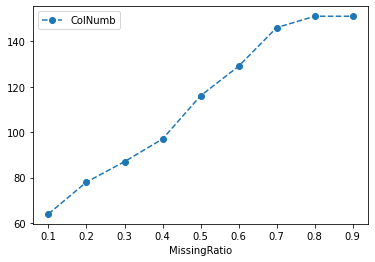

In [26]:
plot_col_num_for_dif_missing_ratio(data)  

After we delete columns whose missing ratio is larger than 0.1, the missing value for this data shrink from 32902 to 60

In [27]:
missing_cols = filter_columns_by_missing_ratio(data, 0.1)
new_df = data.drop(columns=missing_cols)
new_df.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      4
FLAG_DOCUMENT_18      4
FLAG_DOCUMENT_19      4
FLAG_DOCUMENT_20      4
FLAG_DOCUMENT_21      4
Length: 63, dtype: int64

In [28]:
print('If I drop none, the original {} data will be reduced to {} rows, which mean {}({:%}) get removed'.format(len(new_df),len(new_df.dropna()),len(new_df)-len(new_df.dropna()),(len(new_df)-len(new_df.dropna()))/len(new_df)))
new_df = new_df.dropna()

If I drop none, the original 14721 data will be reduced to 14661 rows, which mean 60(0.407581%) get removed


In [29]:
'TARGET' in potential_num_df.columns

False

In [30]:
num_col = list(set(potential_num_list) & set(new_df.columns))
num_df = new_df.loc[:,num_col]
num_col

['AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_REGISTRATION',
 'AMT_CREDIT',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'CODE_GENDER',
 'AMT_INCOME_TOTAL',
 'REG_CITY_NOT_LIVE_CITY',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT',
 'REG_REGION_NOT_WORK_REGION',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_BIRTH',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'HOUR_APPR_PROCESS_START',
 'DAYS_LAST_PHONE_CHANGE',
 'SK_ID_CURR',
 'DAYS_ID_PUBLISH',
 'CNT_CHILDREN',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REG_CITY_NOT_WORK_CITY']

In [31]:
num_desc = show_description(num_col, data_desc)
num_desc.to_csv('num_desc.csv')
num_desc

,Column,Desc
0,AMT_GOODS_PRICE,For consumer loans it is the price of the good...
1,EXT_SOURCE_2,Normalized score from external data source
2,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...
3,DAYS_REGISTRATION,How many days before the application did clien...
4,AMT_CREDIT,Credit amount of the loan
5,REG_REGION_NOT_LIVE_REGION,Flag if client's permanent address does not ma...
6,LIVE_REGION_NOT_WORK_REGION,Flag if client's contact address does not matc...
7,CODE_GENDER,Gender of the client
8,AMT_INCOME_TOTAL,Income of the client
9,REG_CITY_NOT_LIVE_CITY,Flag if client's permanent address does not ma...


In [32]:
cat_col = list(set(cat_columns) & set(new_df.columns))
cat_df = new_df.loc[:,cat_col]
cat_col

['NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_DOCUMENT_17',
 'ORGANIZATION_TYPE',
 'FLAG_DOCUMENT_21',
 'NAME_TYPE_SUITE',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'NAME_INCOME_TYPE',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_20',
 'NAME_HOUSING_TYPE',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_19',
 'FLAG_EMAIL',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_16',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_18',
 'FLAG_WORK_PHONE',
 'FLAG_DOCUMENT_2',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE']

In [33]:
cat_desc = show_description(cat_col, data_desc)
cat_desc.to_csv('cat_desc.csv')
cat_desc

,Column,Desc
0,NAME_EDUCATION_TYPE,Level of highest education the client achieved
1,NAME_FAMILY_STATUS,Family status of the client
2,FLAG_DOCUMENT_17,Did client provide document 17
3,ORGANIZATION_TYPE,Type of organization where client works
4,FLAG_DOCUMENT_21,Did client provide document 21
5,NAME_TYPE_SUITE,Who was accompanying client when he was applyi...
6,FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)"
7,FLAG_DOCUMENT_7,Did client provide document 7
8,FLAG_DOCUMENT_9,Did client provide document 9
9,NAME_INCOME_TYPE,"Clients income type (businessman, working, mat..."


# Handling missing values

## Check nan for all the data

In [34]:
new_df.isnull().sum().sum()

0

## Train test split

In [35]:
data = new_df.loc[:,cat_col+num_col+['TARGET']]
data.to_csv('data_without_missing_val.csv')
data.shape

(14661, 63)

In [36]:
# for col in cat_col:
#     print(col,data.loc[:,col].unique())
df = cat_df.copy(deep=True)
for column in cat_col:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
cat_df = df
cat_col = [i for i in cat_df.columns if (i != 'TARGET') and (i not in num_col)]
cat_df = cat_df.loc[:,cat_col]

In [37]:
cat_col

['NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'FLAG_DOCUMENT_17_0.0',
 'FLAG_DOCUMENT_17_1.0',
 'ORGANIZATION_TYPE_Advertising',
 'ORGANIZATION_TYPE_Agriculture',
 'ORGANIZATION_TYPE_Bank',
 'ORGANIZATION_TYPE_Business Entity Type 1',
 'ORGANIZATION_TYPE_Business Entity Type 2',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Construction',
 'ORGANIZATION_TYPE_Culture',
 'ORGANIZATION_TYPE_Electricity',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Government',
 'ORGANIZATION_TYPE_Hotel',
 'ORGANIZATION_TYPE_Housing',
 'ORGANIZATION_TYPE_Industry: type 1',
 'ORGANIZATION_TYPE_Industry: type 1

In [38]:
num_df = my_standarization("RobustScaler", x_vars = num_col, data = num_df)


Data shape (14661, 26)
Finished Standarization


In [39]:
num_df = my_normalization("l2", x_vars = num_col, data = num_df)
data = pd.concat([num_df,cat_df,data['TARGET']],axis=1)

Finished Normalization


In [40]:
'SK_ID_CURR' in data.columns

True

In [41]:
x_vars = [i for i in data.columns if (i != 'TARGET')]
y_var = 'TARGET'

In [42]:
data.loc[:,cat_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14661 entries, 0 to 14716
Columns: 143 entries, NAME_EDUCATION_TYPE_Academic degree to NAME_CONTRACT_TYPE_Revolving loans
dtypes: uint8(143)
memory usage: 2.6 MB


In [43]:
X, y = data.loc[:,data.columns != 'TARGET'], data.loc[:,['TARGET']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify = y,test_size=0.2)
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

# Save train and test data 

In [44]:
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

# Select features

In [45]:
feature_num = 20
feature_dict = select_features(data, x_vars, y_var, feature_num)      

Choose by  RandomForest
Choose by  ExtraTree
Choose by  LogisticRegression


# Modeling

## RandomForest
1. Use the features selected by RandomForest to train, and test using cross_val_score
2. Use all the features to train, and test using cross_val_score

In [46]:
make_classification(model_name='RandomForest', x_vars = feature_dict['RandomForest'], y_var='TARGET', train_data = train_data, test_data = test_data)


RandomForest classifer achieved recall 0.7907
RandomForest classifer achieved roc_auc 0.9824


In [47]:
make_classification(model_name='RandomForest', x_vars = x_vars, y_var='TARGET', train_data = train_data, test_data = test_data)


RandomForest classifer achieved recall 0.7907
RandomForest classifer achieved roc_auc 0.983


LogisticRegression classifer achieved mean: 0.07813953488372093 recall (std: 0.025029998227113878)<br>
LogisticRegression classifer achieved mean: 0.7853682058905498 roc_auc (std: 0.009058205642588855)

In [48]:
make_classification(model_name='LogisticRegression', x_vars = feature_dict['RandomForest'], y_var='TARGET', train_data = train_data, test_data = test_data)

LogisticRegression classifer achieved recall 0.06512
LogisticRegression classifer achieved roc_auc 0.7799


In [49]:
make_classification(model_name='ExtraTree', x_vars = feature_dict['RandomForest'], y_var='TARGET', train_data = train_data, test_data = test_data)

ExtraTree classifer achieved recall 0.7907
ExtraTree classifer achieved roc_auc 0.9856


# please install the packages using 'pip install -r requirement.txt'

In [50]:
!pip freeze > requirement.txt

In [51]:
feature_dict

{'RandomForest': ['AMT_GOODS_PRICE',
  'EXT_SOURCE_2',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'DAYS_REGISTRATION',
  'AMT_CREDIT',
  'LIVE_REGION_NOT_WORK_REGION',
  'CODE_GENDER',
  'AMT_INCOME_TOTAL',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT',
  'REGION_POPULATION_RELATIVE',
  'REGION_RATING_CLIENT_W_CITY',
  'DAYS_BIRTH',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'HOUR_APPR_PROCESS_START',
  'DAYS_LAST_PHONE_CHANGE',
  'SK_ID_CURR',
  'DAYS_ID_PUBLISH',
  'CNT_CHILDREN',
  'OBS_60_CNT_SOCIAL_CIRCLE'],
 'ExtraTree': ['AMT_GOODS_PRICE',
  'EXT_SOURCE_2',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'DAYS_REGISTRATION',
  'AMT_CREDIT',
  'CODE_GENDER',
  'AMT_INCOME_TOTAL',
  'CNT_FAM_MEMBERS',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'HOUR_APPR_PROCESS_START',
  'DAYS_LAST_PHONE_CHANGE',
  'SK_ID_CURR',
  'DAYS_ID_PUBLISH',
  'CNT_CHILDREN',
  'OBS_60_CNT_SOCIAL_CIRCLE',
  'ORGANIZATION_TYPE_Medicine',
  'ORGANIZATION_TYPE_Other',
  'WEEKDAY_APPR_PROCESS_START_FRIDAY'],
 